In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from math import *
%matplotlib inline

In [2]:
file = os.listdir('/Volumes/NO NAME/untitled folder')
print(file)

['anuj', 'divij']


In [3]:
labels = []
faces_paths = []

for f in file:
    images = os.listdir('/Users/anujarora/Desktop/Data/'+f)
    for pic in images:
        faces_paths.append('/Users/anujarora/Desktop/Data/'+f+'/'+pic)
        labels.append(f)

In [4]:
print(labels)

['anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'anuj', 'divij', 'divij', 'divij', 'divij', 'divij', 'divij', 'divij', 'divij', 'divij', 'divij', 'divij', 'divij', 'divij', 'divij']


In [5]:
imgs = []

for fx in faces_paths:
    img = cv2.imread(fx)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)

In [6]:
print(imgs)

[array([[[119,  91,  88],
        [126,  98,  94],
        [126, 101,  96],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[121,  96,  91],
        [124,  99,  94],
        [126, 103,  97],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[127, 108, 101],
        [125, 106,  99],
        [128, 109, 102],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 58,  43,  50],
        [ 60,  47,  54],
        [ 60,  47,  54],
        ...,
        [175, 152, 136],
        [175, 152, 136],
        [176, 150, 137]],

       [[ 55,  42,  49],
        [ 58,  45,  52],
        [ 59,  46,  53],
        ...,
        [178, 152, 137],
        [178, 152, 137],
        [176, 150, 137]],

       [[ 55,  42,  51],
        [ 57,  44,  51],
        [ 59,  46,  53],
        ...,
        [179, 153, 138],
        [180, 152, 138],
        [178, 150, 138]

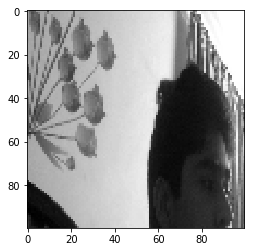

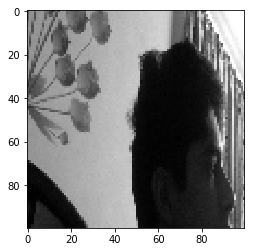

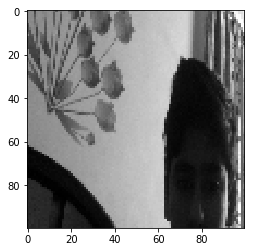

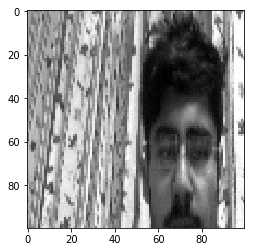

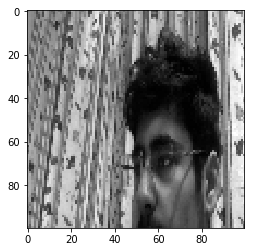

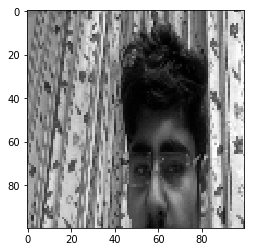

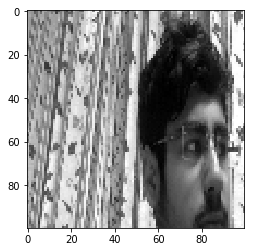

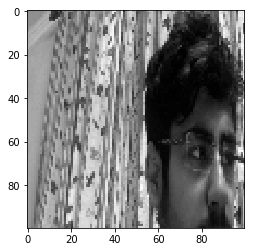

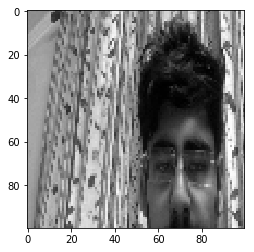

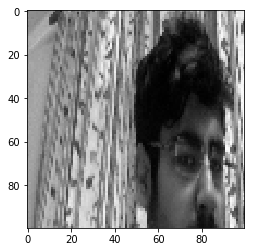

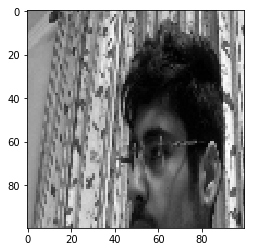

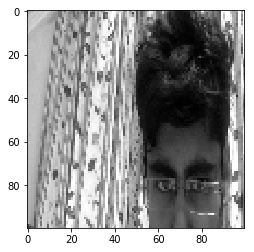

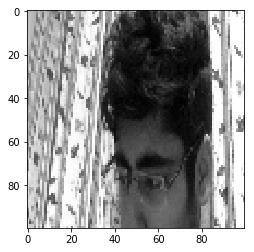

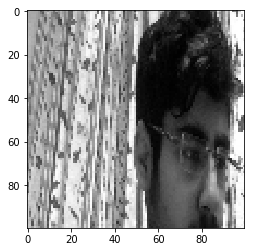

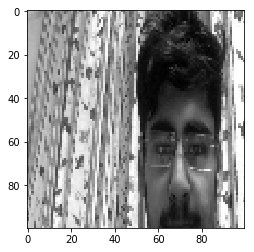

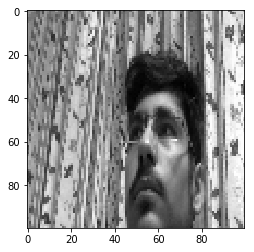

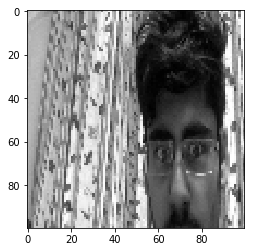

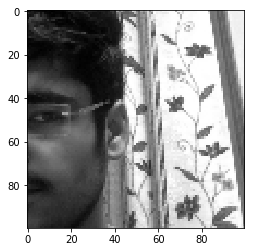

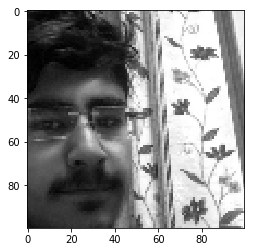

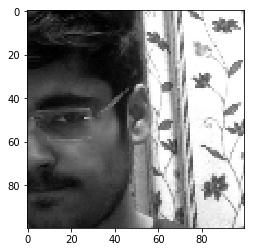

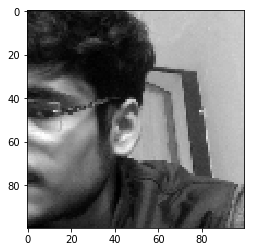

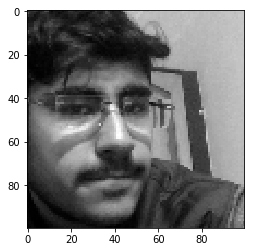

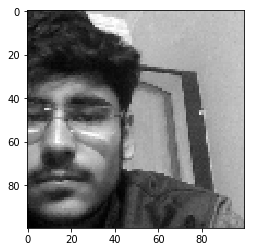

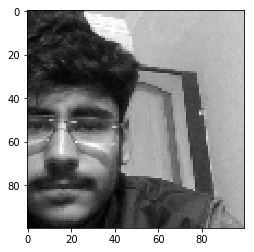

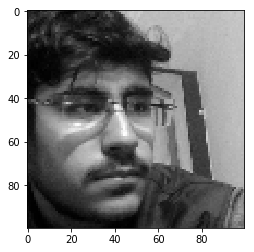

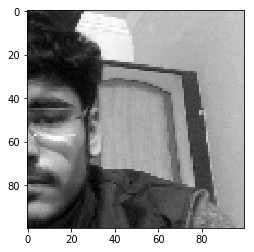

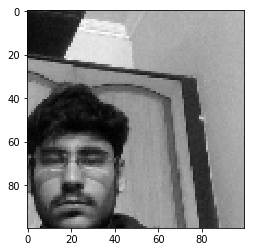

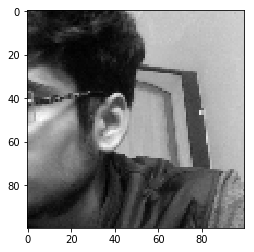

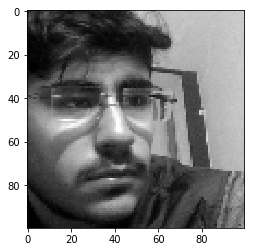

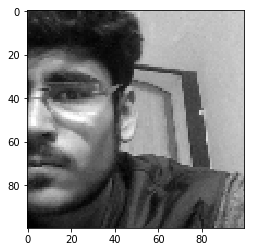

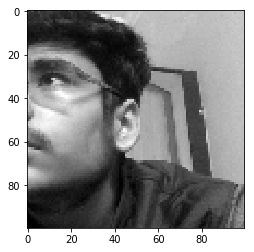

In [7]:
all_faces = []

for i in range(17):
    im = imgs[i][20:400,50:800,:]
    img = cv2.resize(im, (100,100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    all_faces.append(img)
    plt.imshow(img, cmap='gray')
    plt.show()
    
for i in range(17,31):
    im = imgs[i][80:500,500:900,:]
    img = cv2.resize(im, (100,100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    all_faces.append(img)
    plt.imshow(img, cmap='gray')
    plt.show()

In [8]:
all_faces = np.asarray(all_faces)
lab = np.asarray(labels[:])

np.save('facelabels',lab)
np.save('facedata', all_faces)

In [9]:
face = np.load('facedata.npy')
labels = np.load('facelabels.npy')

print("Before",face.shape)
face = face.reshape(face.shape[0], face.shape[1] * face.shape[2])

print("After",face.shape)

cap = cv2.VideoCapture(0)
dataset = cv2.CascadeClassifier('/Users/anujarora/Downloads/haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX

def recognize_face(img):
    im = cv2.resize(img,(100,100))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = im.flatten()
    
    def dist(x1,x2):
        return np.sqrt(((x1-x2)**2).sum())

#     X_train = face
#     y_train = labels
#     x = im

    #X_train = face, x = im, y_train = labels
    def knn(X_train, x, y_train, k = 7):
        vals = []

        for i in range(X_train.shape[0]):
            v = [dist(x, X_train[i,:]), y_train[i]]
            vals.append(v)

        updated_vals = sorted (vals, key = lambda x : x[0])
        pred_arr = np.asarray(updated_vals[:k])
        pred_arr = np.unique(pred_arr[:, 1], return_counts = True)
        pred = pred_arr[1].argmax()
        return pred_arr[0][pred]

    result = knn(face, im, labels, 7)
    return result

while True:
    ret,img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # print gray.shape
    faces = dataset.detectMultiScale(gray, 1.3, 5)

    for x,y,w,h in faces:
        fc = img[x:x+w, y:y+h, :]
        output = recognize_face(fc)
        cv2.putText(img, output, (x, y), font, 1, (255, 255, 0), 2)
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    cv2.imshow('rgb', img)
    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()

Before (31, 100, 100)
After (31, 10000)


error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215) ssize.width > 0 && ssize.height > 0 in function resize
